# 1) Analysis of Customer Spending Behaviour
## Group Final Report for STAT 301 201

Date: April 14th, 2025

**Group 30:**
- Jibek Dzhunusova
- Arun Kumar
- Nathan Chan
- Jae Shin



## 2) Introduction

Being able to predict how much a customer is likely to spend is a valuable asset for any business looking to personalize marketing, improve customer targeting, and allocate resources more effectively. This analysis is focused on building a model that can predict total spending based on the information we have about each customer.

In this case, total spending is defined as the sum of a customer’s expenditures over the last two years across six product categories:

`total_spending` = `MntWines` + `MntFruits` + `MntMeatProducts` + `MntFishProducts` + `MntSweetProducts` + `MntGoldProds`

To make these predictions, we’ll use linear regression—a straightforward and widely used modeling technique for continuous outcomes. Although linear regression can be used for inference, our goal here is purely predictive: we want to build a model that can estimate total spending as accurately as possible using features such as age, income, previous purchases, and marketing campaign engagement.

The goal is to model and predict a customer's total spending (summed over the last two years) using available demographic, behavioral, and marketing data — excluding `ID` — to understand which factors are most informative for spending behavior.

- **Response Variable**: `total_spending` = `MntWines` + `MntFruits` + `MntMeatProducts` + `MntFishProducts` + `MntSweetProducts` + `MntGoldProds`.
  
- **Explanatory Variables**:
    - *Demographics*: `Year_Birth`, `Education`, `Marital_Status`, `Income`.
    - *Household*: `Kidhome`, `Teenhome`.
    - *Engagement*: `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth`, `Recency`.
    - *Promotion Response*: `AcceptedCmp1` to `AcceptedCmp5`, `Response`.

The dataset includes a variety of customer information, including demographic variables (like age and income), behavioral indicators (such as response to marketing campaigns), and historical purchase data. These features will serve as inputs to our model, helping us generate spending predictions for new or existing customers.

Since the primary objective is prediction, we focus on building a model that accurately estimates total spending. Rather than interpreting individual coefficients, we prioritize overall performance and generalizability. Feature selection is used to improve accuracy, with the goal of developing a practical model businesses can use to anticipate customer value and personalize engagement.

## 3) Methods And Results

## a) Data Description

***For Data Description - credit goes to Jibek Dzhunusova (Individual Assignment 1)***

*The dataset used in this report is from the [Kaggle - Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) dataset on Kaggle, which contains customer-level information for a marketing campaign.*


The Marketting Campaign dataset consists of **2240 observations** and **29 variables**, categorized into four key features types: 

**1. People** - demographics and household information
   - `ID`: Customer's unique identifier *(Categorical - ID)*
   - `Year_Birth`: Customer's birth year *(Continuous Numeric)*
   - `Education`: Customer's education level *(Categorical)*
   - `Marital_Status`: Customer's marital status *(Categorical)*
   - `Income`: Customer's yearly household income *(Continious Numeric)*
   - `Kidhome`: Number of children in customer's household *(Discrete Numeric)*
   - `Teenhome`: Number of teenagers in customer's household *(Discrete Numeric)*
   - `Dt_Customer`: Date of customer's enrollment with the company *(Date)*
   - `Recency`: Number of days since customer's last purchase *(Continuous Numeric)*
   - `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise *(Categorical - Binary)*
     
**2. Products** - spending behaviour on various product categores
   - `MntWines`: Amount spent on wine in last 2 years *(Continuous Numeric)*
   - `MntFruits`: Amount spent on fruits in last 2 years *(Continuous Numeric)*
   - `MntMeatProducts`: Amount spent on meat in last 2 years *(Continuous Numeric)*
   - `MntFishProducts`: Amount spent on fish in last 2 years *(Continuous Numeric)*
   - `MntSweetProducts`: Amount spent on sweets in last 2 years *(Continuous Numeric)*
   - `MntGoldProds`: Amount spent on gold in last 2 years *(Continuous Numeric)*

**3. Promotion** - customer responses to marketting campaigns
   - `NumDealsPurchases`: Number of purchases made with a discount *(Discrete Numeric)*
   - `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise *(Categorical - Binary)*
   - `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise *(Categorical - Binary)*
   - `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise *(Categorical - Binary)*
   - `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise *(Categorical - Binary)*
   - `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise *(Categorical - Binary)*
   - `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise *(Categorical - Binary)*
     
**4. Place** - ourchasing channels and frequency
   - `NumWebPurchases`: Number of purchases made through the company’s website *(Discrete Numeric)*
   - `NumCatalogPurchases`: Number of purchases made using a catalogue *(Discrete Numeric)*
   - `NumStorePurchases`: Number of purchases made directly in stores *(Discrete Numeric)*
   - `NumWebVisitsMonth`: Number of visits to company’s website in the last month *(Discrete Numeric)*

The dataset is **observational**, and the primary response variable in our analysis is `total_spending`, defined as the sum of all monetary amounts spent across six product categories over two years. No customer ID or personally identifiable information is used in the modeling.

## Source and Information
### Acknowledgement
The Marketing Campaign dataset was provided by Dr. Omar Romero-Hernandez. Licensed as CC0: Public Domain, "You can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission". The exact method of data collection is not explicitly stated.

In [1]:
library(MASS)
library(broom)
library(repr)
library(tidyverse)
library(modelr)
library(leaps)
library(tidymodels)
library(car)
library(readr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘modelr’


The following object is masked from ‘package:broom’:

    bootstrap


── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ dials        1.2.1     ✔ rsample      1.2.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ recipes      1.1.0     ✔ yardstick    1.3.1

── Conflicts ──────────

In [2]:
df <- read_tsv("https://raw.githubusercontent.com/arkumar57/STAT301PROJECT/refs/heads/main/marketing_campaign.csv")

Rows: 2240 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Education, Marital_Status, Dt_Customer
dbl (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntF...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(df)

ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


In [4]:
df <- df %>% select(- "ID",-"Z_Revenue", - "Z_CostContact")

In [5]:
summary(df)

   Year_Birth    Education         Marital_Status         Income      
 Min.   :1893   Length:2240        Length:2240        Min.   :  1730  
 1st Qu.:1959   Class :character   Class :character   1st Qu.: 35303  
 Median :1970   Mode  :character   Mode  :character   Median : 51382  
 Mean   :1969                                         Mean   : 52247  
 3rd Qu.:1977                                         3rd Qu.: 68522  
 Max.   :1996                                         Max.   :666666  
                                                      NA's   :24      
    Kidhome          Teenhome      Dt_Customer           Recency     
 Min.   :0.0000   Min.   :0.0000   Length:2240        Min.   : 0.00  
 1st Qu.:0.0000   1st Qu.:0.0000   Class :character   1st Qu.:24.00  
 Median :0.0000   Median :0.0000   Mode  :character   Median :49.00  
 Mean   :0.4442   Mean   :0.5062                      Mean   :49.11  
 3rd Qu.:1.0000   3rd Qu.:1.0000                      3rd Qu.:74.00  
 Max.   :2.0

In [6]:
# Main developer: Jibek Dzhunusova
# Data Cleaning
missing_values <- colSums(is.na(df))
missing_values[missing_values > 0]

# Removing missing values
df_clean <- df %>%
  filter(!is.na(Income))

# Count occurrences of each Marital_Status category
table(df_clean$Marital_Status)

# Merging small categories with "Single"
df_clean <- df_clean %>%
  mutate(Marital_Status = ifelse(Marital_Status %in% c("YOLO", "Absurd", "Alone"), "Single", Marital_Status))

# Check that "YOLO", "Absurd", "Alone" merged
table(df_clean$Marital_Status)

# Creating a new variable (response): TotalSpending
df_clean <- df_clean %>%
  mutate(TotalSpending = MntWines + MntFruits + MntMeatProducts + 
                         MntFishProducts + MntSweetProducts + MntGoldProds)

Income 
    24


  Absurd    Alone Divorced  Married   Single Together    Widow     YOLO 
       2        3      232      857      471      573       76        2 


Divorced  Married   Single Together    Widow 
     232      857      478      573       76 

In [7]:
head(df_clean)

Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,⋯,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,⋯,4,7,0,0,0,0,0,0,1,1617
1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,⋯,2,5,0,0,0,0,0,0,0,27
1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,⋯,10,4,0,0,0,0,0,0,0,776
1984,Graduation,Together,26646,1,0,10-02-2014,26,11,4,⋯,4,6,0,0,0,0,0,0,0,53
1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,⋯,6,5,0,0,0,0,0,0,0,422
1967,Master,Together,62513,0,1,09-09-2013,16,520,42,⋯,10,6,0,0,0,0,0,0,0,716


## b) Exploratory Data Analysis (EDA)
***For EDA - credit goes to Jibek Dzhunusova (Individual Assignment 1)***

### Data cleaning:

- Missing income values were removed, as income plays a crucial role in the study. This is a 5% of the total dataset, as this would not impact the model's performance or alter the distribution of the predictors.
- Rare Marital Status categories ("YOLO", "Absurd", and "Alone") were merged into the "Single" category to prevent sparsity and ensure meaningful comparisons.
- A new response variable, `TotalSpending`, was created by summing expenditures across different product categories (wines, fruits, meat, fish, sweets, and gold).
- Since spending is measured over two years, monthly spending can be estimated by dividing TotalSpending by 24. This could provide a clearer view of customer spending habits on a regular basis.

### Analyzing Household Structure:
- Customers without children showed significantly higher spending over two years (~902 USD) than those with one (205 USD) or two (136 USD) kids.
- The impact of teenagers (`Teenhome`) was less clear, but households with one teen had lower spending over two years (~511 USD) compared to those with no teens (693 USD) or two teens (580 USD).

In [8]:
# Main developer: Jibek Dzhunusova 
# Group spending by number of children (Kidhome)
df_clean %>%
  group_by(Kidhome) %>%
  summarise(AverageSpending = mean(TotalSpending, na.rm = TRUE))

# Group spending by number of teenagers (Teenhome)
df_clean %>%
  group_by(Teenhome) %>%
  summarise(AverageSpending = mean(TotalSpending, na.rm = TRUE))

Kidhome,AverageSpending
<dbl>,<dbl>
0,901.9501
1,204.9966
2,135.7609


Teenhome,AverageSpending
<dbl>,<dbl>
0,693.4054
1,511.1582
2,580.0784


### Analyzing Engagement Behaviour (Shopping behaviour)
- Catalog purchases had the strongest correlation with spending (0.78), followed by in-store purchases (0.67).
- Web purchases also showed a positive correlation (0.53), but website visits were negatively correlated (-0.49), indicating that frequent visitors do not necessarily spend more.

In [9]:
# Main developer: Jibek Dzhunusova
# Analyzing Engagement Behaviour (Shopping behaviour)

# Selecting only numerical variables
numeric_vars <- df_clean %>%
  select(Income, TotalSpending, NumWebPurchases, 
         NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth)

# Computing correlation matrix
cor_matrix <- cor(numeric_vars, use = "complete.obs")
print(cor_matrix)

                        Income TotalSpending NumWebPurchases
Income               1.0000000     0.6675761      0.38787781
TotalSpending        0.6675761     1.0000000      0.52897334
NumWebPurchases      0.3878778     0.5289733      1.00000000
NumCatalogPurchases  0.5891624     0.7804818      0.38686764
NumStorePurchases    0.5293621     0.6751811      0.51624018
NumWebVisitsMonth   -0.5530880    -0.4990820     -0.05122626
                    NumCatalogPurchases NumStorePurchases NumWebVisitsMonth
Income                        0.5891624         0.5293621       -0.55308801
TotalSpending                 0.7804818         0.6751811       -0.49908197
NumWebPurchases               0.3868676         0.5162402       -0.05122626
NumCatalogPurchases           1.0000000         0.5178405       -0.52200377
NumStorePurchases             0.5178405         1.0000000       -0.43239826
NumWebVisitsMonth            -0.5220038        -0.4323983        1.00000000


### Analyzing Promotion Response:
- Customers who accepted a promotional campaign had an average spending of about 986 USD over two years, nearly double the spending of those who did not accept (about 540 USD over two years).

In [10]:
# Main developer: Jibek Dzhunusova 
# Promotion Response

df_clean %>%
  group_by(Response) %>%
  summarise(AverageSpending = mean(TotalSpending, na.rm = TRUE))

Response,AverageSpending
<dbl>,<dbl>
0,540.1243
1,985.6607


### Visualization:

- A boxplot was chosen to examine Total Spending by Education Level, grouped by Marital Status and Income Group.

This plot was selected because it effectively captures the relationship between three demographic factors while providing insights into how income and education influence spending across different marital groups. While shopping engagement showed the highest correlation with total spending (0.37), demographics were chosen for visualization due to their relevance in defining customer profiles and their indirect influence on financial capacity and spending behavior. Although engagement behavior has the strongest direct correlation with spending, demographics remain essential for understanding consumer segmentation and targeting strategies. Differences in spending across education levels, marital status, and income groups offer valuable insights into how various consumer groups behave, helping businesses tailor their outreach and engagement efforts. Additionally, demographics may indirectly influence shopping behavior, further highlighting their importance in understanding broader consumer trends.

#### Key observations of Boxplot:

- Across all marital statuses, individuals with a Master's or PhD spend the most.
- High-income group consistenly has highest spending.
- Low-income individuals have very low spending across all education levels.
- Medium-income has more variation, but still much lower than high-income customers.
- Married and Together customers tend to have higher spending variability, possibly due to shared finances.
- Divorced, Single, and Widow groups show lower overall spending, but high-income individuals still stand out.

Overall, the boxplot below suggests that income and education are strong indicators of spending behaviour. While married status has some effect, but income still remains the strongest predictor of total spending, showing the greatest variation across groups. Additionally, the observed differences in spending across income levels—especially among medium and high-income customers—suggest a potential nonlinear relationship, which was later explored in the model using a polynomial transformation of income.

In [11]:
# Main developer: Jibek Dzhunusova
df_clean$Education_numeric <- as.numeric(as.factor(df_clean$Education))
df_clean$Marital_Status_numeric <- as.numeric(as.factor(df_clean$Marital_Status))

demographics <- df_clean %>% select(Year_Birth, Income, Education_numeric, Marital_Status_numeric)
household <- df_clean %>% select(Kidhome, Teenhome)
engagement <- df_clean %>% select(NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth)
promotion <- df_clean %>% select(AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response)

# Computing average correlation for each category with TotalSpending
cor_demographics <- mean(cor(demographics, df_clean$TotalSpending, use = "complete.obs"))
cor_household <- mean(cor(household, df_clean$TotalSpending, use = "complete.obs"))
cor_engagement <- mean(cor(engagement, df_clean$TotalSpending, use = "complete.obs"))
cor_promotion <- mean(cor(promotion, df_clean$TotalSpending, use = "complete.obs"))

# Making a summary table
category_correlation <- data.frame(
  Category = c("Demographics", "Household Structure", "Engagement Behavior", "Promotion Response"),
  Average_Correlation = c(cor_demographics, cor_household, cor_engagement, cor_promotion)
)

print(category_correlation)

             Category Average_Correlation
1        Demographics           0.1675213
2 Household Structure          -0.3480258
3 Engagement Behavior           0.3713886
4  Promotion Response           0.2588728


In [12]:
# Main developer: Jibek Dzhunusova
# Creating Income Groups (Low, Medium, High) using quantiles
df_clean <- df_clean %>%
  mutate(IncomeGroup = cut(Income, 
                           breaks = quantile(Income, probs = c(0, 0.33, 0.66, 1), na.rm = TRUE), 
                           labels = c("Low", "Medium", "High"),
                           include.lowest = TRUE))

# Convert IncomeGroup to factor (for coloring)
df_clean$IncomeGroup <- factor(df_clean$IncomeGroup, levels = c("Low", "Medium", "High"))

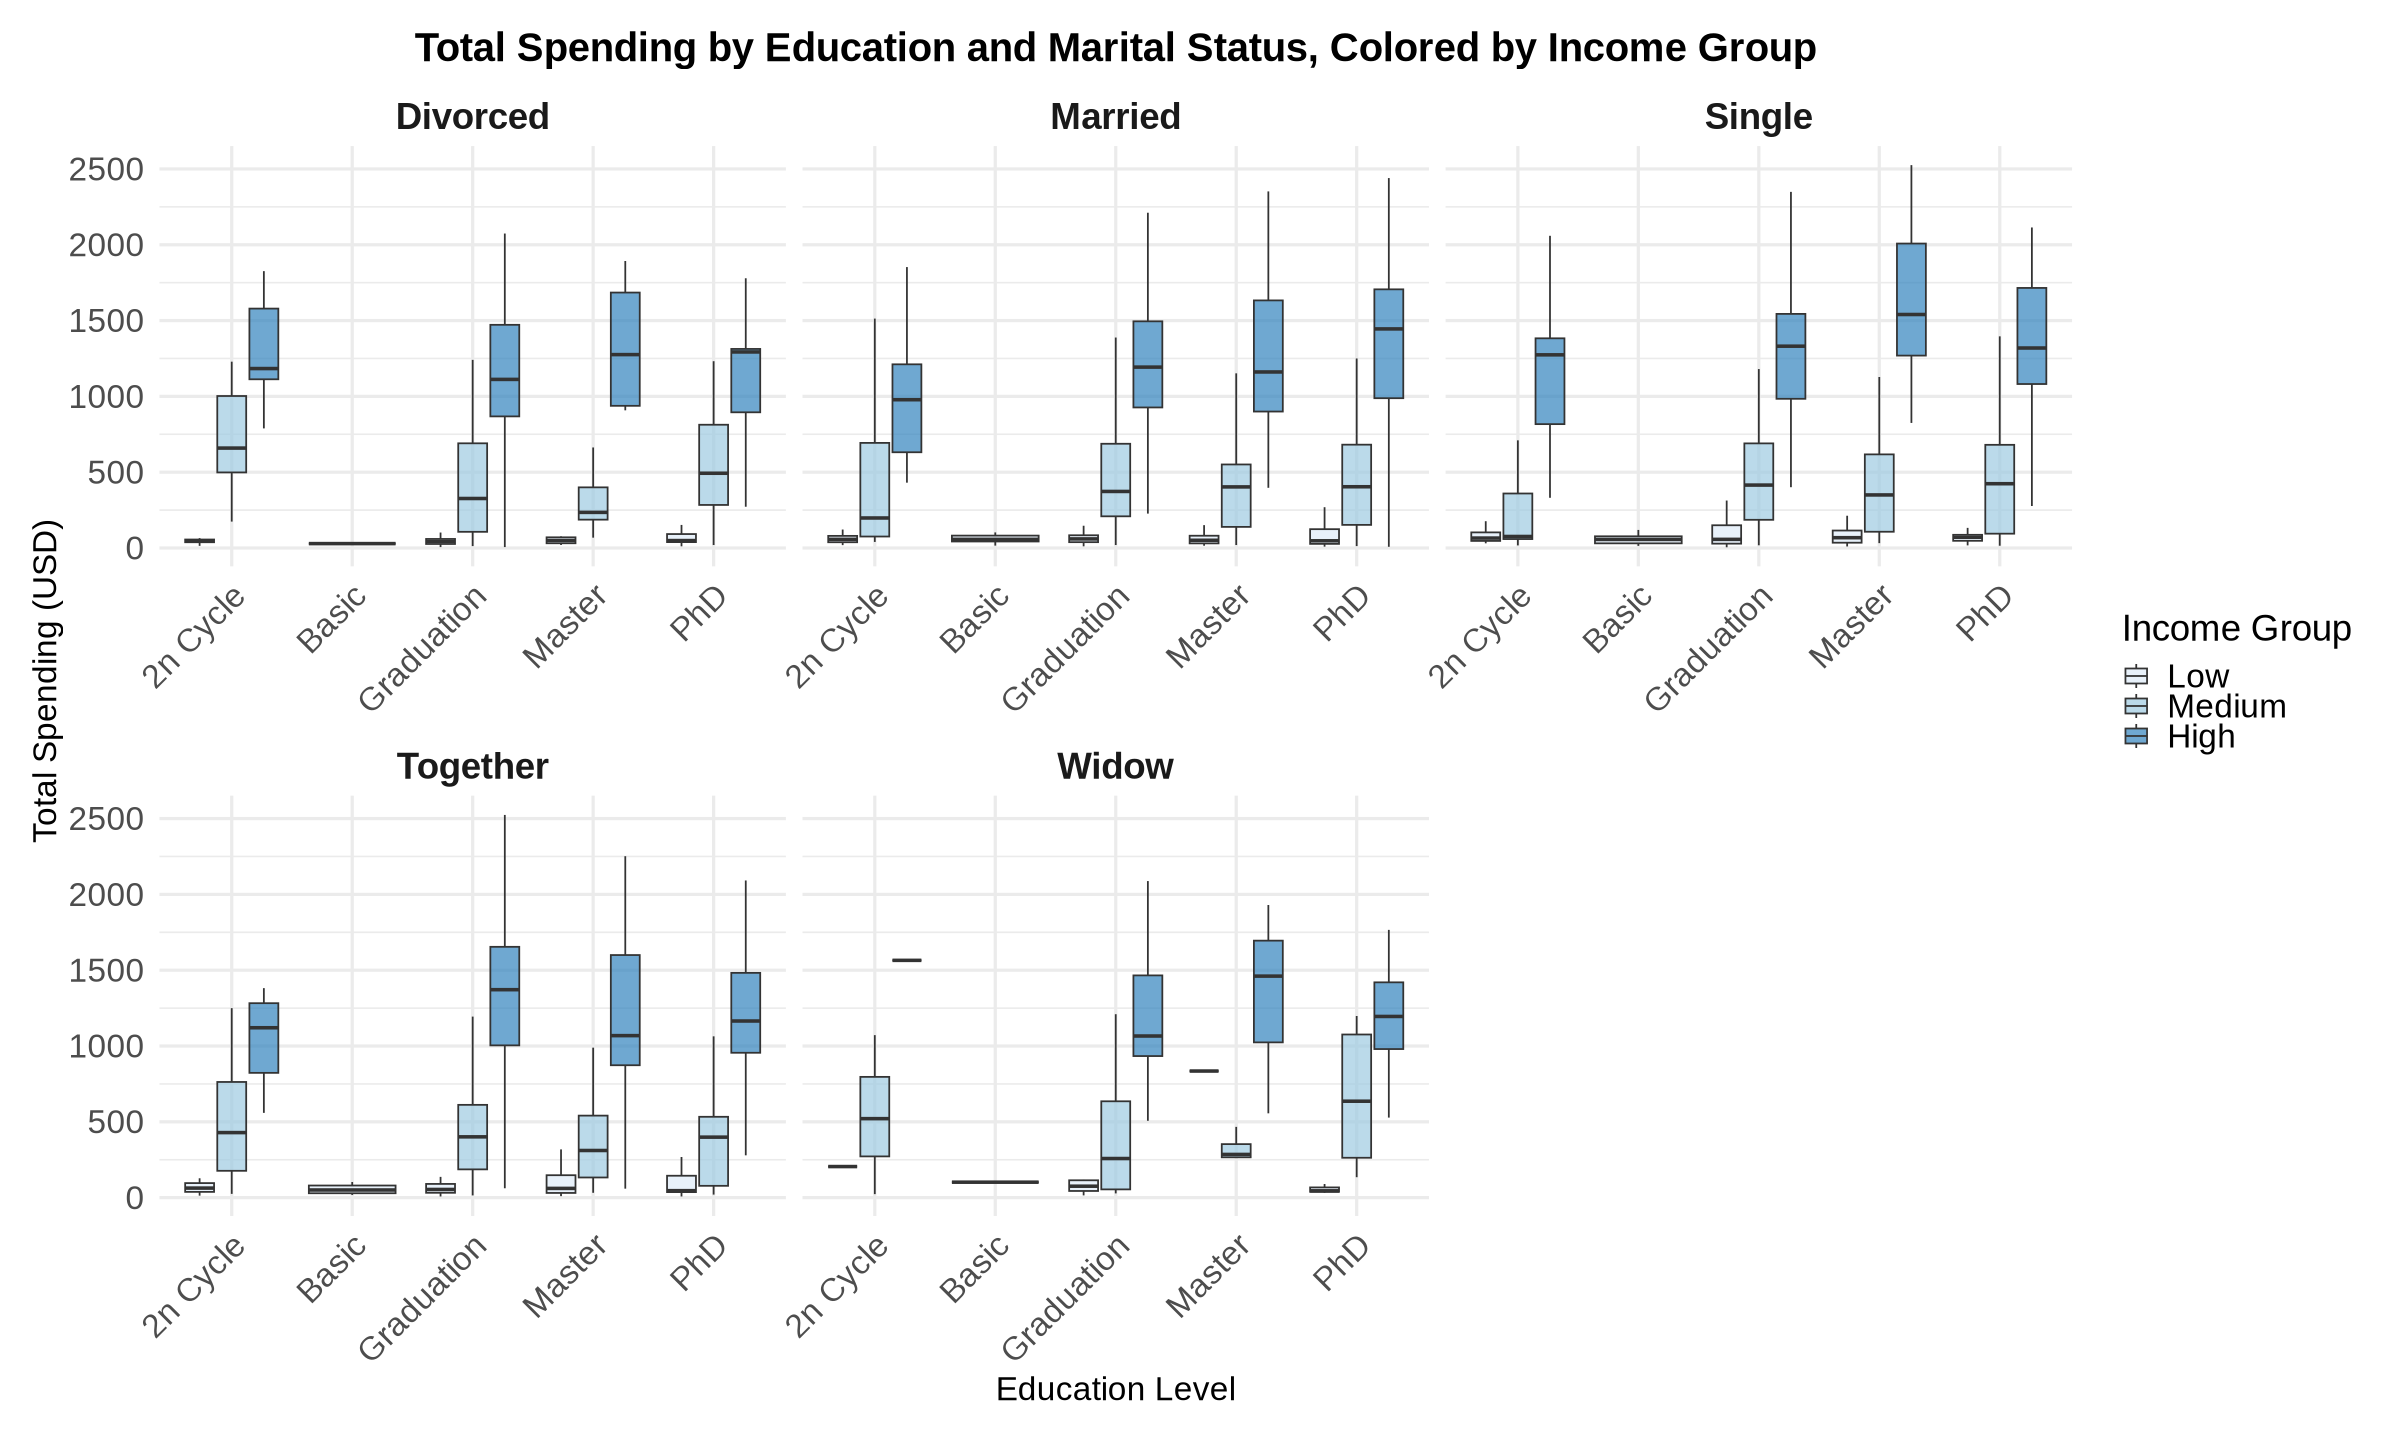

In [13]:
# Main developer: Jibek Dzhunusova
options(repr.plot.width = 20, repr.plot.height = 12)
my_plot <- ggplot(df_clean, aes(x = Education, y = TotalSpending, fill = IncomeGroup)) + 
  geom_boxplot(outlier.shape = NA, alpha = 0.7, width = 0.8) +
  facet_wrap(~Marital_Status, scales = "free_x", ncol = 3) +
  scale_fill_brewer(palette = "Blues") +
  theme_minimal(base_size = 20) +
  labs(title = "Total Spending by Education and Marital Status, Colored by Income Group",
       x = "Education Level",
       y = "Total Spending (USD)",
       fill = "Income Group") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 22, face = "bold"),
        legend.text = element_text(size = 20),
        legend.title = element_text(size = 22),
        plot.title = element_text(size = 24, face = "bold", hjust = 0.5),
        plot.margin = margin(20, 20, 20, 20))

my_plot

## c) Methods: Plan

The goal of this project is to predict total customer spending using the available demographic, behavioral, and promotional response data. Given that the response variable `total_spending` is continuous, **Multiple Linear Regression (MLR)** was chosen as a solid baseline approach. MLR offers simplicity, transparency, and the flexibility to incorporate both continuous and categorical inputs—once the latter are properly encoded.

### Data Preparation and Variable Selection

Prior to modeling, we standardized all numerical variables to ensure comparability across predictors and avoid scale-related bias in regression coefficients. Categorical variables such as `Education`, `Marital_Status`, `Kidhome`, `Teenhome`, and `IncomeGroup` were converted to factors or dummy-coded to allow proper treatment in the regression model. The `total_spending` variable was calculated as the sum of expenditures across six product categories. The `ID` variable was removed as it did not provide any predictive value.

We then split the data into training (60%) and testing (40%) sets using stratified sampling to maintain the distribution of the response variable. The training data was used to build the model, and the testing data was reserved to evaluate its predictive performance.

Our **Exploratory Data Analysis (EDA)** revealed several key associations:

- ***Behavioral variables*** like `NumCatalogPurchases`, `NumStorePurchases`, and `NumWebPurchases` showed a positive relationships with total spending.
- ***Engagement response*** indicators, especially `AcceptedCmp5`, were linked to higher spending.
- ***Household*** structure variables (`Kidhome`, `Teenhome`) showed a negative association with total spending.
- ***Demographic*** factors such as income level and education also exhibited meaningful variation in spending across groups.

Based on these insights, we included a broad range of predictors spanning demographic, behavioral, and promotional engagement features. To avoid overfitting and identify the most useful predictors, we applied stepwise variable selection using the Akaike Information Criterion (AIC). This method adds predictors that improve model fit while penalizing unnecessary complexity, helping to remove uninformative variables and reduce multicollinearity.

The final model retained several important predictors:

- ***Behavioral***: `NumCatalogPurchases`, `NumStorePurchases`, `NumWebPurchases`,  `NumDealsPurchases`, `NumWebVisitsMonth`, `Recency`.

- ***Promotional***: `AcceptedCmp1,` `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`.

- ***Demographic and household***: `IncomeGroup`, `Education`, `Kidhome`, `Teenhome`.

### Model Evaluation and Interpretation

The final model selected through forward stepwise regression included **15 predictors** spanning behavioral, promotional, and demographic features. It has achieved an adjusted **R² of 0.8415** on the training data and **0.8180** on the test data, indicating strong explanatory power and generalizability.

Prediction error remained low and consistent across datasets, with **RMSE values of 239.3 (train) and 252.1 (test)**. These results suggest the model is capable of reliably estimating spending across a range of customer profiles.

Customer purchase behavior  (`NumCatalogPurchases`, `NumStorePurchases`, `NumWebPurchases`), and marketting engagement(`AcceptedCmp1`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`) were the key factors that most increased prediction accuracy. These variables contributed substantially to the model’s ability to estimate total spending, which aligns with the business logic that frequent purchasers and engaged customers tend to spend more. On the other hand, household-related variables like `Kidhome` and `Teenhome` helped the model identify lower-spending customer profiles, while `IncomeGroup` and `Education` level improved predictions for higher spenders. 

Importantly, all selected predictors showed low multicollinearity (GVIF < 2), indicating the model’s stability. Overall, the model is well-suited for predicting customer spending and can support marketing efforts aimed at identifying and targeting high-value customers.

## Computational Code and Output
***For computational code of methods - credit goes to Arun Kumar (Individual assignment 2)***

Below is the stepwise approach to produce the related computational code and output.

In [14]:
# Main developer: Arun Kumar
# excluding variables we do not need
df <- df_clean %>% select(- "Year_Birth", -"Dt_Customer", -"MntWines", -"MntFruits", -"MntMeatProducts", -"MntFishProducts", -"MntSweetProducts",
                    -"MntGoldProds", -"Marital_Status_numeric", -"Education_numeric")

In [15]:
# Main developer: Arun Kumar
# Standarizing numerical vars to prevents features with larger magnitudes from dominating the regression

colums_to_standarize <- c("Income", "Recency", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", 
                          "NumWebVisitsMonth")
df[colums_to_standarize] <- scale(df[colums_to_standarize])

In [16]:
# Main developer: Arun Kumar
# converting "Kidhome", "Teenhome", "Education", "Marital_Status" to factor data type to be dealt as categorical variables.

df <- df %>%
  mutate_at(vars(c("Kidhome", "Teenhome", "Education", "Marital_Status", "IncomeGroup")), as.factor)

In [17]:
head(df)

Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,IncomeGroup
<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Graduation,Single,0.2340099,0,0,0.3104621,0.3516341,1.4282310,2.5041470,-0.55401784,0.6930755,0,0,0,0,0,0,1,1617,Medium
Graduation,Single,-0.2345065,1,1,-0.3804236,-0.1681932,-1.1256271,-0.5709535,-1.16925390,-0.1315448,0,0,0,0,0,0,0,27,Medium
Graduation,Together,0.7693040,0,0,-0.7949549,-0.6880206,1.4282310,-0.2292757,1.29169031,-0.5438550,0,0,0,0,0,0,0,776,High
Graduation,Together,-1.0170092,1,0,-0.7949549,-0.1681932,-0.7607902,-0.9126314,-0.55401784,0.2807654,0,0,0,0,0,0,0,53,Low
PhD,Married,0.2401673,1,0,1.5540562,1.3912888,0.3337204,0.1124021,0.06121821,-0.1315448,0,0,0,0,0,0,0,422,Medium
Master,Together,0.4078067,0,1,-1.1403978,-0.1681932,0.6985572,0.4540800,1.29169031,0.2807654,0,0,0,0,0,0,0,716,Medium


In [18]:
# Main developer: Arun Kumar
# Spliting the dataset in training and testing set for model evaluation
set.seed(1234)

df_split <- 
    df %>%
    initial_split(prop = 0.6, strata = TotalSpending)

training_df <- training(df_split)
testing_df <- testing(df_split)

In [19]:
head(training_df)
head(testing_df)

Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,IncomeGroup
<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
PhD,Together,-1.8511544,1,1,0.6559049,-0.6880206,-1.1256271,-0.9126314,-1.7844900,6.0531078,1,0,0,0,0,0,0,49,Low
Graduation,Married,-1.3873652,0,0,-0.3804236,-0.6880206,-1.1256271,-0.9126314,-0.8616359,1.1053857,0,0,0,0,0,0,0,46,Low
Master,Married,-1.2588152,1,0,1.3467905,-0.1681932,-0.7607902,-0.9126314,-0.8616359,1.1053857,0,0,0,0,0,0,0,53,Low
Master,Married,-1.7775837,1,0,-1.0367649,0.3516341,-0.7607902,-0.9126314,-0.8616359,-0.1315448,0,0,0,0,0,0,0,31,Low
Graduation,Together,-0.4178771,1,0,1.4849676,-0.6880206,-0.7607902,-0.9126314,-1.1692539,1.9300061,0,0,0,0,0,0,0,55,Medium
Graduation,Single,-0.9656846,1,0,-0.6222335,-0.6880206,-1.1256271,-0.9126314,-0.5540178,-0.9561652,0,0,0,0,0,0,0,29,Low


Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,IncomeGroup
<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Graduation,Single,0.2340099,0,0,0.3104621,0.3516341,1.4282310,2.5041470,-0.5540178,0.6930755,0,0,0,0,0,0,1,1617,Medium
Graduation,Single,-0.2345065,1,1,-0.3804236,-0.1681932,-1.1256271,-0.5709535,-1.1692539,-0.1315448,0,0,0,0,0,0,0,27,Medium
Graduation,Together,0.7693040,0,0,-0.7949549,-0.6880206,1.4282310,-0.2292757,1.2916903,-0.5438550,0,0,0,0,0,0,0,776,High
Graduation,Together,-1.0170092,1,0,-0.7949549,-0.1681932,-0.7607902,-0.9126314,-0.5540178,0.2807654,0,0,0,0,0,0,0,53,Low
Graduation,Divorced,0.1345783,0,1,-0.5186007,0.8714615,1.0633941,0.1124021,0.3688362,0.2807654,0,0,0,0,0,0,0,590,Medium
PhD,Together,-0.8698282,1,0,-1.0367649,-0.6880206,-0.3959534,-0.9126314,-1.1692539,1.5176959,0,0,0,0,0,0,1,46,Low


In [20]:
# Main developer: Arun Kumar
# Performing forward stepwise selection using stepAIC to select predictors for MntGoldProds
# Setting K = 2 to compute Akaike Information Criterion(AIC) to balance model fit and complexity

n <- nrow(training_df)
mod_full <- lm(TotalSpending ~ ., data = training_df)  
mod_null <- lm(TotalSpending ~ 1, data = training_df)
modAIC_forward <- MASS::stepAIC(mod_null, direction = "forward",
              scope = list(lower = mod_null, upper = mod_full), k = 2)

Start:  AIC=17018.45
TotalSpending ~ 1

                      Df Sum of Sq       RSS   AIC
+ IncomeGroup          2 328042125 159566450 15539
+ NumCatalogPurchases  1 287282241 200326335 15839
+ NumStorePurchases    1 221141530 266467045 16218
+ Income               1 179548084 308060492 16411
+ Kidhome              2 159885541 327723035 16495
+ NumWebPurchases      1 129311755 358296820 16611
+ NumWebVisitsMonth    1 123553667 364054909 16632
+ AcceptedCmp5         1 111087723 376520852 16677
+ AcceptedCmp1         1  70345542 417263034 16814
+ AcceptedCmp4         1  38814993 448793582 16910
+ Response             1  35849200 451759375 16919
+ AcceptedCmp2         1  16036166 471572409 16976
+ Education            4  13529645 474078931 16989
+ Teenhome             2  10285061 477323515 16994
+ NumDealsPurchases    1   2941835 484666740 17012
<none>                             487608575 17018
+ AcceptedCmp3         1    604450 487004126 17019
+ Complain             1    568099 4870404

In [21]:
summary(modAIC_forward)


Call:
lm(formula = TotalSpending ~ IncomeGroup + NumCatalogPurchases + 
    AcceptedCmp5 + NumStorePurchases + NumWebPurchases + Teenhome + 
    Response + Kidhome + NumWebVisitsMonth + AcceptedCmp1 + AcceptedCmp4 + 
    AcceptedCmp3 + NumDealsPurchases + Recency + Education, data = training_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1127.65  -101.08    -8.68    89.28   967.21 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          402.542     28.475  14.137  < 2e-16 ***
IncomeGroupMedium    131.383     21.689   6.058 1.80e-09 ***
IncomeGroupHigh      535.320     30.219  17.715  < 2e-16 ***
NumCatalogPurchases  178.849      9.771  18.304  < 2e-16 ***
AcceptedCmp5         316.388     30.546  10.358  < 2e-16 ***
NumStorePurchases    104.331      9.761  10.689  < 2e-16 ***
NumWebPurchases       59.314      8.688   6.827 1.32e-11 ***
Teenhome1           -130.886     16.694  -7.840 9.27e-15 ***
Teenhome2           -115.980     4

In [22]:
# Main developer: Arun Kumar
# Contributors: Jibek Dzhunusova (debugged)

# Creating a linear regression model using training data set and variables selected by forward stepwise selection using stepAIC
# Chose variables which produced least AIC, equal to 9891.98

selected_model <- lm(TotalSpending ~ IncomeGroup + NumCatalogPurchases + AcceptedCmp5 + 
    NumStorePurchases + NumWebPurchases + Teenhome + Response + 
    Kidhome + NumWebVisitsMonth + AcceptedCmp1 + AcceptedCmp4 + 
    AcceptedCmp3 + NumDealsPurchases + Recency + Education, data  = training_df)

In [23]:
# Main developer: Arun Kumar
selected_model_tidy <- tidy(selected_model, conf.int = TRUE)

In [24]:
selected_model_tidy

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),402.54203,28.474783,14.1367900,2.511526e-42,346.6807134,458.40335
IncomeGroupMedium,131.38346,21.689292,6.0575266,1.804817e-09,88.8337999,173.93313
IncomeGroupHigh,535.31959,30.218568,17.7149227,4.248891e-63,476.0373480,594.60184
NumCatalogPurchases,178.84920,9.771030,18.3040269,8.436076e-67,159.6805713,198.01784
AcceptedCmp5,316.38814,30.546055,10.3577417,3.244065e-24,256.4634419,376.31285
NumStorePurchases,104.33066,9.760574,10.6889882,1.268251e-25,85.1825391,123.47878
NumWebPurchases,59.31382,8.687621,6.8273946,1.320874e-11,42.2705997,76.35704
Teenhome1,-130.88584,16.694007,-7.8402893,9.273875e-15,-163.6358482,-98.13584
Teenhome2,-115.97986,44.494831,-2.6065918,9.248931e-03,-203.2690243,-28.69070


In [25]:
# Main developer: Arun Kumar
training_df <- training_df %>% modelr::add_predictions(selected_model, var = "predicted_value")

In [26]:
# Main developer: Arun Kumar
# Adding the predicted values for the variable "MntGoldProds" of data points under column name "predicted_value"

testing_df <- testing_df %>% modelr::add_predictions(selected_model, var = "predicted_value")

In [27]:
head(testing_df)

Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,⋯,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,IncomeGroup,predicted_value
<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
Graduation,Single,0.2340099,0,0,0.3104621,0.3516341,1.4282310,2.5041470,-0.5540178,⋯,0,0,0,0,0,0,1,1617,Medium,1153.40789
Graduation,Single,-0.2345065,1,1,-0.3804236,-0.1681932,-1.1256271,-0.5709535,-1.1692539,⋯,0,0,0,0,0,0,0,27,Medium,27.55400
Graduation,Together,0.7693040,0,0,-0.7949549,-0.6880206,1.4282310,-0.2292757,1.2916903,⋯,0,0,0,0,0,0,0,776,High,1114.04592
Graduation,Together,-1.0170092,1,0,-0.7949549,-0.1681932,-0.7607902,-0.9126314,-0.5540178,⋯,0,0,0,0,0,0,0,53,Low,63.48994
Graduation,Divorced,0.1345783,0,1,-0.5186007,0.8714615,1.0633941,0.1124021,0.3688362,⋯,0,0,0,0,0,0,0,590,Medium,584.04148
PhD,Together,-0.8698282,1,0,-1.0367649,-0.6880206,-0.3959534,-0.9126314,-1.1692539,⋯,0,0,0,0,0,0,1,46,Low,134.28260


In [28]:
# Main developer: Arun Kumar
# Calculating Adjusted R^2 to evaluate the model on testing data set

rss <- sum((testing_df$predicted_value - testing_df$TotalSpending)^2)  # Residual Sum of Squares
tss <- sum((testing_df$TotalSpending - mean(testing_df$TotalSpending))^2)  # Total Sum of Squares
r_squared <- 1 - (rss / tss)


n <- nrow(testing_df)  
p <- length(coef(selected_model)) - 1  

adjusted_r_squared <- 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))


adjusted_r_squared

[1] 0.817995

In [29]:
# Main developer: Arun Kumar
my_table <- data.frame(
  Dataset = c("Testing_dataset", "Training_dataset"),
  Adjusted_RSquared = c(0.81799,0.8415)
)
print(my_table)

           Dataset Adjusted_RSquared
1  Testing_dataset           0.81799
2 Training_dataset           0.84150


In [30]:
# Main developer: Arun Kumar
rmse_train <- sqrt(mean((training_df$TotalSpending - training_df$predicted_value)^2))
rmse_test <- sqrt(mean((testing_df$TotalSpending - testing_df$predicted_value)^2))
rmse_test
rmse_train

[1] 252.0679

[1] 239.3203

In [31]:
# Main developer: Arun Kumar
my_table <- data.frame(
  Dataset = c("Testing_dataset", "Training_dataset"),
  Root_Mean_Squared_Error = c(252.067854845845,239.32032099519)
)
print(my_table)

           Dataset Root_Mean_Squared_Error
1  Testing_dataset                252.0679
2 Training_dataset                239.3203


In [32]:
# Main developer: Arun Kumar
# applied vif function to get Generalized Variance Inflation Factor to check multicollinearity amongst variables.
vif(selected_model)

,GVIF,Df,GVIF^(1/(2*Df))
IncomeGroup,4.616128,2,1.465782
NumCatalogPurchases,2.277793,1,1.509236
AcceptedCmp5,1.454217,1,1.205909
NumStorePurchases,2.158065,1,1.469035
NumWebPurchases,1.793555,1,1.339237
Teenhome,1.576672,2,1.120561
Response,1.401323,1,1.183775
Kidhome,2.110684,2,1.205330
NumWebVisitsMonth,2.295220,1,1.514998
AcceptedCmp1,1.300954,1,1.140594


## 4. Discussion


## 5. References

- The Marketing Campaign dataset was provided by Dr. Omar Romero-Hernandez. Licensed as CC0: Public Domain, "You can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission". The exact method of data collection is not explicitly stated.